First Install LightKurve

In [ ]:
pip install lightkurve --upgrade

In [ ]:
from lightkurve import search_targetpixelfile

# First we open a Target Pixel File from MAST, this one is already cached from our previous tutorial!
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=15).download()

# Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

^ This will import and set up a star and its lightcurve. TPF is the brightness/imaging data.

Now you can show the imaging data in a plot based on which frame:

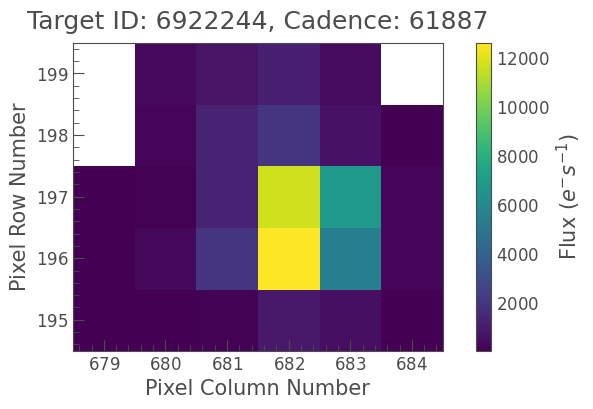

In [ ]:
tpf.plot(frame=1);


In [ ]:
lc = tpf.to_lightcurve(aperture_mask='all');


In [ ]:
lc.time
lc.flux
lc.plot

<bound method LightCurve.plot of <KeplerLightCurve length=4446 LABEL="KIC 6922244" QUARTER=15 CAMPAIGN=None>
       time             flux           flux_err      ... cadenceno quality
                    electron / s     electron / s    ...                  
       Time           float32          float32       ...   int32    int32 
------------------ -------------- ------------------ ... --------- -------
1373.4875980881334  50700.8515625  10.93747329711914 ...     61886       0
1373.5080310512276 50668.37109375 10.937039375305176 ...     61887       0
1373.5284638140874 50677.62109375 10.937310218811035 ...     61888       0
1373.5488966769408 50677.29296875 10.937393188476562 ...     61889       0
1373.5693296395693   50683.828125 10.937393188476562 ...     61890       0
1373.5897624019635   50664.421875 10.936796188354492 ...     61891       0
1373.6101952641184  50668.4453125  10.93703842163086 ...     61892       0
1373.6306282262813   50647.421875 10.936393737792969 ...     61893

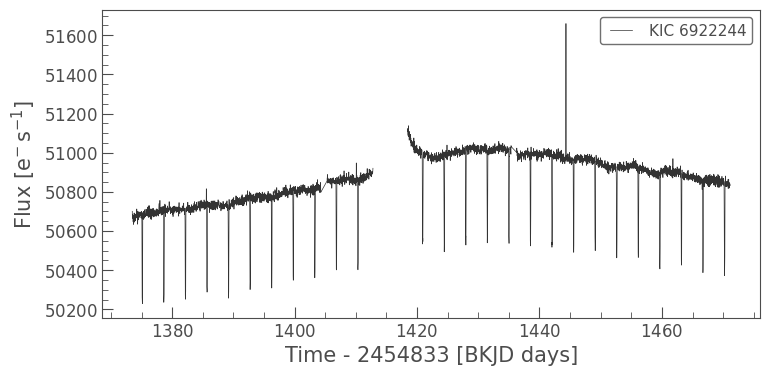

In [ ]:
%matplotlib inline
lc.plot();

You can flatten and remove long term flux trends using .flatten(window_length)

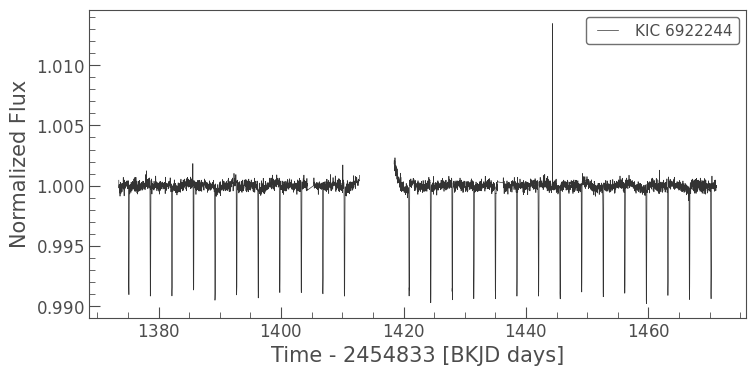

In [ ]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

It is also possible to "fold" data to phases to show more detail in the cycles of the star

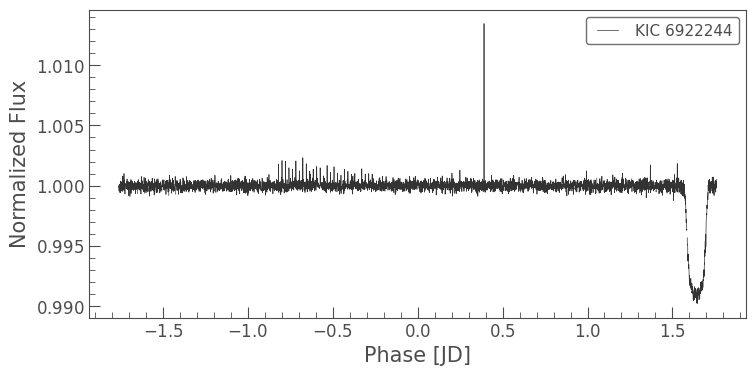

In [ ]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot();

You can average out all data by binning.

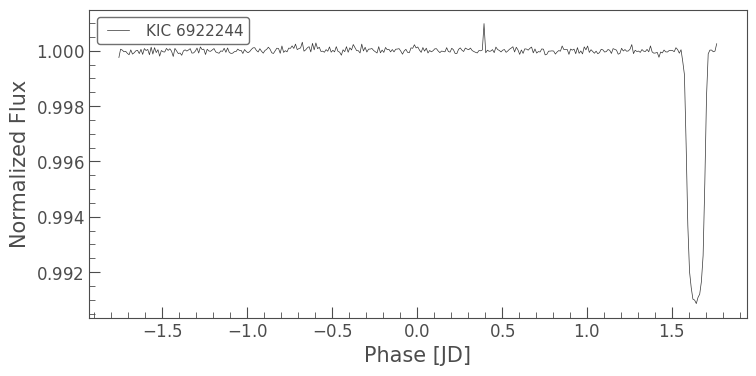

In [ ]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot();

In [ ]:
print(binned_lc)

        time               flux        ... cadenceno quality
                                       ...                  
------------------- ------------------ ... --------- -------
-1.7559474468725966 0.9997564800079982 ...     64176   21065
-1.7459474468725966 1.0000574065695451 ...     64452       0
-1.7359474468725966 1.0000242084147828 ...     63999   25269
-1.7259474468725966 0.9999635806322331 ...     64473   28086
-1.7159474468725966 0.9999814700390041 ...     64136   33398
-1.7059474468725966   0.99990784861273 ...     64474   28086
-1.6959474468725966 0.9998576374299439 ...     64159   32778
-1.6859474468725966 1.0000329888819584 ...     64303    2925
-1.6759474468725966 0.9998812475174775 ...     64433    2048
-1.6659474468725968 0.9999278841412105 ...     64098    3150
                ...                ... ...       ...     ...
 1.6740525531273742 0.9916650324853491 ...     64467       0
  1.684052553127374 0.9926027268138875 ...     64252    2730
 1.6940525531273738 0.99